In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hijest/genre-classification-dataset-imdb")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\debas\.cache\kagglehub\datasets\hijest\genre-classification-dataset-imdb\versions\1


In [2]:
import os

#listing all files inside the TASK_1 folder
print(os.listdir(path))

['Genre Classification Dataset']


In [3]:
data_folder = os.path.join(path,'Genre Classification Dataset')
print("Files inside 'Genre Classification Dataset':",os.listdir(data_folder))

Files inside 'Genre Classification Dataset': ['description.txt', 'test_data.txt', 'test_data_solution.txt', 'train_data.txt']


In [4]:
import pandas as pd
train_path = os.path.join(data_folder,'train_data.txt')
test_path = os.path.join(data_folder,'test_data.txt')
solution_path = os.path.join(data_folder,'test_data_solution.txt')



In [5]:

train_df = pd.read_csv(train_path,sep=' ::: ',engine='python',header=None)
test_df = pd.read_csv(test_path,sep=' ::: ',engine='python',header=None)
solution_df = pd.read_csv(solution_path,sep=' ::: ',engine='python',header=None)

print("File Loaded Successfully ✅")
print("Train Shape:", train_df.shape)
print("Test Shape:", test_df.shape)


File Loaded Successfully ✅
Train Shape: (54214, 4)
Test Shape: (54200, 3)


In [6]:
train_df.head()

,0,1,2,3
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...


In [7]:
solution_df.head()

,0,1,2,3
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apart..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty chi..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family o...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with his..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a marti...


In [8]:
test_df

,0,1,2
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apart..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty chi..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family o...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with his..."
4,5,Er nu zhai (1955),Before he was known internationally as a marti...
...,...,...,...
54195,54196,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Dar..."
54196,54197,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their ...
54197,54198,Oliver Twink (2007),"A movie 169 years in the making. Oliver Twist,..."
54198,54199,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard ..."


In [9]:
train_df.columns = ['ID','TITLE','GENRE','PLOT']
test_df.columns = ['ID','TITLE','PLOT']
solution_df.columns = ['ID','TITLE','GENRE','PLOT']


In [10]:
train_df.shape

(54214, 4)

In [11]:
test_df.shape

(54200, 3)

In [12]:
solution_df.shape

(54200, 4)

In [13]:
#Text Cleaning and preprocessing

import re
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()


In [14]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\debas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [15]:
def lemmatize_text(text):
    return ' '.join([lemmatizer.lemmatize(w) for w in text.split()])

In [16]:
# cleaning applied
train_df['PLOT'] = train_df['PLOT'].apply(lemmatize_text)
solution_df['PLOT'] = solution_df['PLOT'].apply(lemmatize_text)



In [17]:
#Preparing and Extracting input labels and features

X_train = train_df['PLOT']
y_train = train_df['GENRE']

X_test = solution_df['PLOT']
y_test = solution_df['GENRE']

In [18]:
#converting cleaned text into numerical vectors for better understanding of models
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf= TfidfVectorizer(max_features=10000,ngram_range=(1,3),min_df=5,max_df=0.95,sublinear_tf=True,analyzer='word')
X_train_scaled = tfidf.fit_transform(X_train)
X_test_scaled = tfidf.transform(X_test)



In [19]:
print("After Scaling , X_train_scaled:", X_train_scaled.shape)
print("After Scaling , X_test_scaled:", X_test_scaled.shape)

After Scaling , X_train_scaled: (54214, 10000)
After Scaling , X_test_scaled: (54200, 10000)


In [20]:
#training models
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

nb = MultinomialNB()
lr = LogisticRegression(max_iter=1000,class_weight='balanced')
sv = LinearSVC(class_weight='balanced')

In [21]:
#Fitting the models
nb.fit(X_train_scaled, y_train)


,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [22]:
lr.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [23]:
sv.fit(X_train_scaled, y_train)

,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001
,C,1.0
,multi_class,'ovr'
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,verbose,0
,random_state,None


In [24]:
#Predicting y_values
y_pred_lr = lr.predict(X_test_scaled)
y_pred_nb = nb.predict(X_test_scaled)
y_pred_sv = sv.predict(X_test_scaled)

In [25]:
#Model evaluation

from sklearn.metrics import classification_report,accuracy_score,f1_score

def evaluate_model(name, y_true, y_pred):
    print(f"{name} Evaluation...\n")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.3f}\n")
    print(f"F1 Score: {f1_score(y_true, y_pred,average='weighted'):.3f}\n")
    print(f"Classification Report: {classification_report(y_true, y_pred,zero_division=0)}\n")


In [26]:
evaluate_model('Logistic Regression', y_test, y_pred_lr)

Logistic Regression Evaluation...

Accuracy: 0.471

F1 Score: 0.502

Classification Report:               precision    recall  f1-score   support

      action       0.32      0.46      0.38      1314
       adult       0.32      0.64      0.42       590
   adventure       0.21      0.32      0.25       775
   animation       0.16      0.27      0.20       498
   biography       0.05      0.23      0.09       264
      comedy       0.61      0.44      0.51      7446
       crime       0.13      0.34      0.19       505
 documentary       0.81      0.58      0.68     13096
       drama       0.71      0.38      0.50     13612
      family       0.15      0.31      0.20       783
     fantasy       0.11      0.24      0.15       322
   game-show       0.63      0.73      0.67       193
     history       0.06      0.24      0.10       243
      horror       0.56      0.64      0.59      2204
       music       0.39      0.71      0.51       731
     musical       0.13      0.30      0.18

In [27]:
evaluate_model('Multinomial Naive Bayes', y_test, y_pred_nb)

Multinomial Naive Bayes Evaluation...

Accuracy: 0.516

F1 Score: 0.435

Classification Report:               precision    recall  f1-score   support

      action       0.58      0.06      0.12      1314
       adult       0.56      0.06      0.11       590
   adventure       0.78      0.05      0.10       775
   animation       0.00      0.00      0.00       498
   biography       0.00      0.00      0.00       264
      comedy       0.49      0.44      0.46      7446
       crime       0.00      0.00      0.00       505
 documentary       0.55      0.89      0.68     13096
       drama       0.47      0.80      0.59     13612
      family       0.00      0.00      0.00       783
     fantasy       0.00      0.00      0.00       322
   game-show       0.93      0.07      0.13       193
     history       0.00      0.00      0.00       243
      horror       0.69      0.31      0.43      2204
       music       0.72      0.04      0.07       731
     musical       0.00      0.00      

In [28]:
evaluate_model('Linear SVC', y_test, y_pred_sv)

Linear SVC Evaluation...

Accuracy: 0.512

F1 Score: 0.528

Classification Report:               precision    recall  f1-score   support

      action       0.29      0.42      0.34      1314
       adult       0.34      0.55      0.42       590
   adventure       0.21      0.31      0.25       775
   animation       0.15      0.24      0.18       498
   biography       0.05      0.08      0.06       264
      comedy       0.59      0.48      0.53      7446
       crime       0.12      0.20      0.15       505
 documentary       0.77      0.72      0.75     13096
       drama       0.67      0.47      0.55     13612
      family       0.15      0.25      0.18       783
     fantasy       0.11      0.18      0.14       322
   game-show       0.63      0.68      0.65       193
     history       0.07      0.11      0.09       243
      horror       0.49      0.64      0.56      2204
       music       0.44      0.63      0.52       731
     musical       0.11      0.19      0.14       27

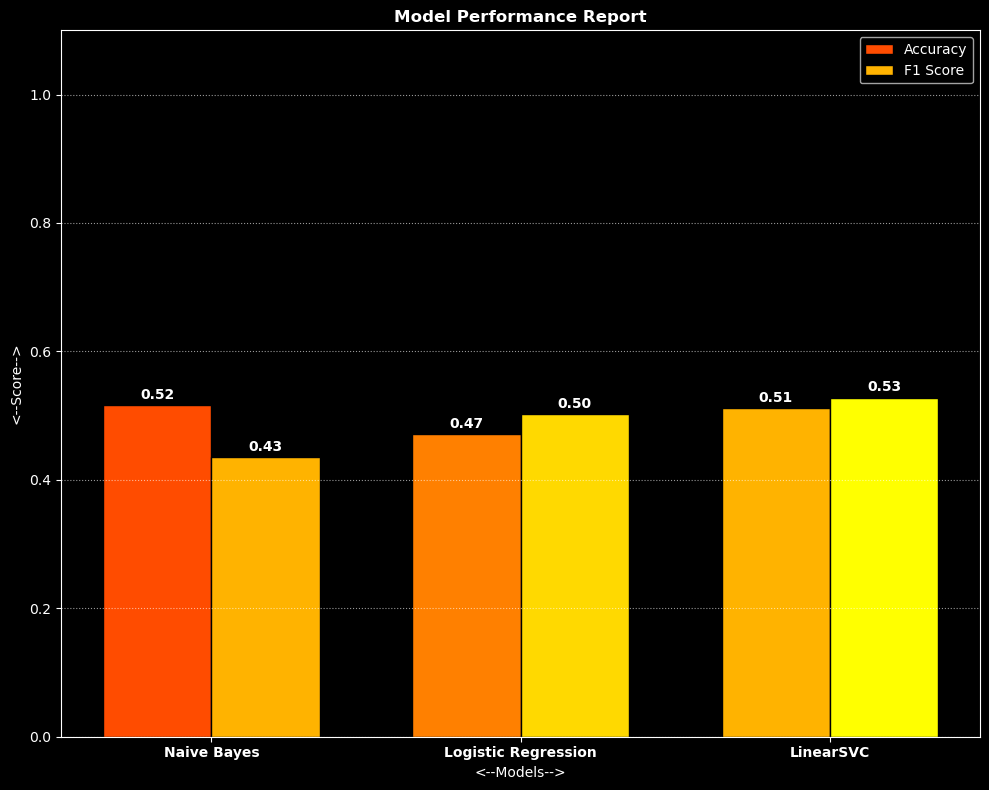

In [30]:
#Model Performance Report

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

models = ['Naive Bayes','Logistic Regression','LinearSVC']

accuracy = [
     0.516,
     0.471,
     0.512 
]
f1_scores =[
     0.435 ,
     0.502,
     0.528   
]

#Defining colors
colors_acc = cm.autumn(np.linspace(0.3,0.7,len(models)))
colors_f1 = cm.autumn(np.linspace(0.7,1.0,len(models)))

#plot settings
x= np.arange(len(models))
width = 0.35

plt.figure(figsize = (10,8))
plt.bar(x-width/2, accuracy, width=width,color=colors_acc,edgecolor='black',label='Accuracy')
plt.bar(x+width/2,f1_scores, width=width,color=colors_f1,edgecolor='black',label='F1 Score')

plt.style.use('dark_background')
# Annotations
for i in range(len(models)):
    plt.text(x[i] - width/2, accuracy[i] + 0.01, f"{accuracy[i]:.2f}", ha='center', fontsize=10, fontweight='bold')
    plt.text(x[i] + width/2, f1_scores[i] + 0.01, f"{f1_scores[i]:.2f}", ha='center', fontsize=10, fontweight='bold')

plt.xticks(x,models,fontsize=10,fontweight='bold')
plt.xlabel('<--Models-->',fontsize=10)
plt.ylabel('<--Score-->',fontsize=10)
plt.title('Model Performance Report',fontsize=12,fontweight='bold')
plt.ylim(0,1.1)
plt.legend(frameon=True,fontsize=10)
plt.grid(axis='y',linestyle='dotted',alpha=0.6)
plt.tight_layout()
plt.show()
plt.style.use('dark_background')



In [31]:
solution_df['GENRE'].unique().tolist()

['thriller',
 'comedy',
 'documentary',
 'drama',
 'horror',
 'short',
 'western',
 'family',
 'sport',
 'romance',
 'war',
 'game-show',
 'biography',
 'adult',
 'talk-show',
 'action',
 'music',
 'crime',
 'animation',
 'sci-fi',
 'adventure',
 'reality-tv',
 'fantasy',
 'mystery',
 'history',
 'news',
 'musical']

In [37]:
#Testing model on  new movie description
new_plot = ['A young wizard discovers his magical heritage and must face a dark sorcerer threatening his world.']

new_plot_preprocessed = [text.lower() for text in new_plot]
X_new = tfidf.transform(new_plot_preprocessed)
predicted_genre = sv.predict(X_new)

print("Predicted Genre:",predicted_genre[0])

Predicted Genre: fantasy


In [38]:
plot = ['Detective Nolan has been in charge of the criminal department since last week .']
plot_preprocessed = [text.lower() for text in plot]
plot_preprocessed = tfidf.transform(plot_preprocessed)

genre_expect = sv.predict(plot_preprocessed)
print(genre_expect)

['crime']
